In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import model_from_json
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
def load_model():
    path = "Models\\"
    json_file = open(path + 'model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()

    model = model_from_json(loaded_model_json)
    model.load_weights(path + "model.h5")
    print("Loaded model from disk")
    return model

Loaded model from disk


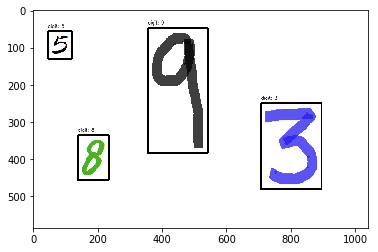

In [3]:
test_image =  cv2.imread('test.jpg')
test_image_gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(test_image_gray,150,255,cv2.THRESH_BINARY_INV) 

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 13)
__, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 

rectangles = [cv2.boundingRect(ctr) for ctr in contours]

model = load_model()

for rect in rectangles:

    cv2.rectangle(test_image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 0), 3)
    leng = abs(int(rect[3]))
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)


    extracted_image = thresh[pt1:pt1+leng, pt2:pt2+leng]
    extracted_image = cv2.resize(extracted_image, (28, 28)).reshape(1,1,28,28).astype('float32')
    
    prediction = np.argmax(model.predict(extracted_image), axis = 1)
    cv2.putText(test_image, 'digit: ' + str(int(prediction[0])), (rect[0], rect[1]-10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
    
    
plt.imshow(test_image,  aspect='auto')
plt.show()
